# Global Shark Attack Incidents

##  Importing packages:

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from src.functions import Case_Number

##  Importing data:

In [ ]:
df = pd.read_csv('./Input/GSAF5.csv', encoding = 'ISO-8859-1')
display(df.head(3))
print(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


(5992, 24)


 ##  A First Look at the Data:

In [ ]:
# Evaluating missing values:
null_cols = df.isnull().sum()
print(null_cols[null_cols > 0])
print('Total rows in the datataset:',df.shape[0])
# Some columns have relatively few null values while others have thousands of nulls.

Country          43
Activity        527
Name            200
Sex             567
Age            2681
Fatal (Y/N)      19
Unnamed: 22    5991
Unnamed: 23    5990
dtype: int64
Total rows in the datataset: 5992


In [ ]:
# Renaming some columns:
df = df.rename(columns={'Fatal (Y/N)': 'Fatal'})
df = df.rename(columns={'Sex ': 'Sex'})
print([e for e in df.columns])

['Date', 'Year', 'Type', 'Country', 'Activity', 'Name', 'Sex', 'Age', 'Fatal']


N    4325
Y    1553
Name: Fatal, dtype: int64


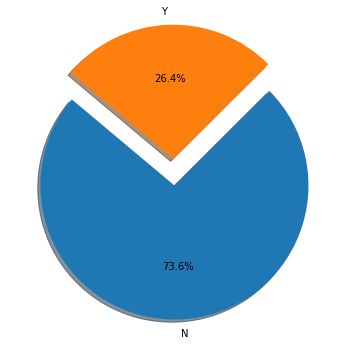

In [ ]:
print(df['Fatal'].value_counts())
explode = [0.1 for i in range(len(df['Fatal'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Fatal'].value_counts()], explode = explode, labels=df['Fatal'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Results:** Most attacks are not fatal (73.6% vs. 26.4%).

✔️ *Most attacks are not fatal because, you know, sharks are cute.*

### Date

In [ ]:
# I'm going to extract 'month' information:

# Months are stored before a dash.
lista_date = [re.findall("(?i)[a-z]+-", str(e)) for e in df['Date']]

lista_date_2 = []
for e in lista_date:
    if len(e)>0:
        lista_date_2.append(e[0][:-1])
    else:
        lista_date_2.append('NaN')

lista_date_2 = [re.sub('Sept', 'Sep', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('March', 'Mar', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('Ap$', 'Apr', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('(?i)mid|Summer|Spanish|Jut', 'NaN', str(e)) for e in lista_date_2]

df['Month'] = lista_date_2
df['Month'].replace({'NaN': np.nan}, inplace=True)
print(set(df.Month))
display(df.head(3))

{nan, 'Jan', 'Nov', 'Sep', 'Jun', 'Mar', 'Jul', 'Dec', 'May', 'Aug', 'Feb', 'Oct', 'Apr'}


,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month
0,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,Sep
1,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep
2,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,Sep


Jul    635
Aug    579
Sep    523
Jan    500
Jun    473
Dec    417
Oct    411
Apr    407
Mar    401
Nov    397
May    369
Feb    360
Name: Month, dtype: int64


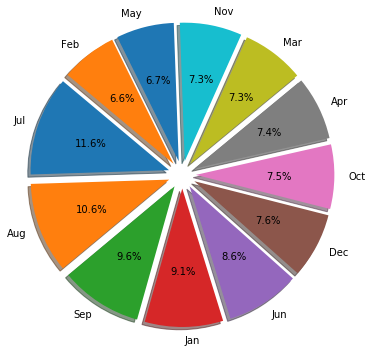

In [ ]:
print(df['Month'].value_counts())
explode = [0.1 for i in range(len(df['Month'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Month'].value_counts()], explode = explode, labels=df['Month'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

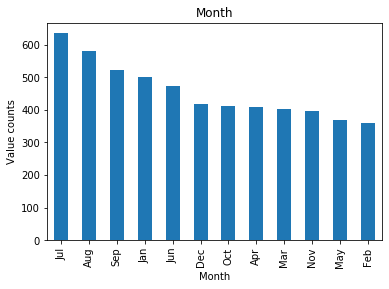

In [ ]:
plt.title('Month')
plt.xlabel('Month')
plt.ylabel('Value counts')
df['Month'].value_counts().plot(kind='bar',)

**Results:** July is the month in which there are more attacks, but the differences between months are minimal.

✔️ *Humans get into the sea in any month of the year.*

### Year

In [ ]:
# df["Year"].value_counts().sort_index()
year_values = [int(e) for e in df["Year"].value_counts().sort_index()]
year_labels = df["Year"].value_counts().sort_index().index.tolist()
year_labels_2 = [int(e) for e in year_labels]
# print(year_values)
# print(year_labels_2)

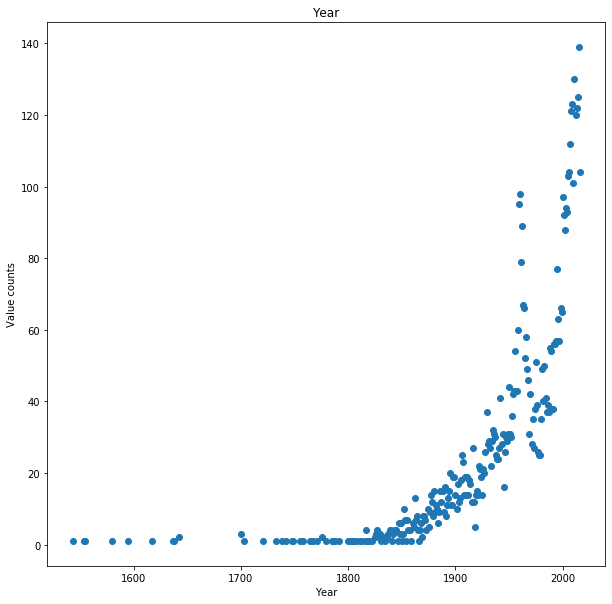

In [ ]:
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Value counts')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(year_labels_2, year_values)

In [ ]:
# I won't need 'Date' column anymore:

df = df.drop(['Date'], axis=1)
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,Sep
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,Sep


**Results:** There are more registered attacks now than in the past.

✔️ *With each passing year (and century), more people go swimming in the sea (of course it is not because attacks are now better registered than in the past...).*

### Century

In [ ]:
# Binning 'Year' to create a new variable: 'Century':

# print(df['Year'].min()) # 1543.0
# print(df['Year'].max()) # 2016.0

year_labels = ['XVI','XVII','XVIII','XIX','XX','XXI']
cutoffs = [1499,1599,1699,1799,1899,1999,2099]
century = pd.cut(df['Year'], cutoffs, labels=year_labels)

df['Century'] = century
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month,Century
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,Sep,XXI
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep,XXI
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,Sep,XXI


XX       3545
XXI      1868
XIX       511
XVIII      22
XVII        5
XVI         5
Name: Century, dtype: int64


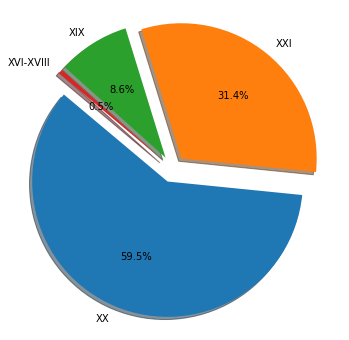

In [ ]:
print(df['Century'].value_counts())
century_value_counts = [e for e in df['Century'].value_counts()]
century_value_counts_grouped = [century_value_counts[0],century_value_counts[1],century_value_counts[2],century_value_counts[3]+century_value_counts[4]+century_value_counts[5]]
explode = [0.1 for i in range(len(century_value_counts_grouped))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(century_value_counts_grouped, explode=explode, labels=['XX','XXI','XIX','XVI-XVIII'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

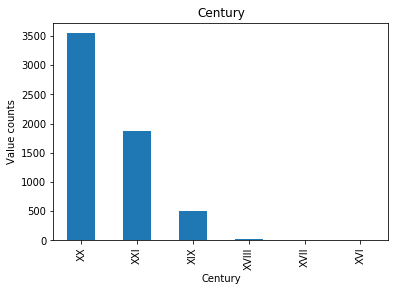

In [ ]:
plt.title('Century')
plt.xlabel('Century')
plt.ylabel('Value counts')
df['Century'].value_counts().plot(kind='bar')

**Results:** There are more registered attacks now than in the past.

✔️ *With each passing year (and century), more people go swimming in the sea (of course it is not because attacks are now better registered than in the past...).*

### Activity

In [ ]:
# I'm going to add to the "Others" category those activities with an occurrence < 10:
lista_aux = []
for e in set(lista_activity_2):
    lista_aux.append((e, lista_activity_2.count(e)))
lista_aux.sort(key=lambda tup: tup[1], reverse=True)

print([e for e in lista_aux if e[1]> 10])
activities = [e[0] for e in lista_aux if e[1]> 10]

[('Swimming', 1047), ('Surfing', 1013), ('Others', 894), ('Fishing', 687), ('Diving', 509), ('Spearfishing', 395), ('Bathing', 177), ('Wading', 162), ('Standing', 128), ('Boarding', 127), ('Snorkeling', 82), ('Floating', 46), ('Treading', 39), ('Kayaking', 35), ('Skiing', 34), ('Attempting', 30), ('Playing', 25), ('Walking', 24), ('Rowing', 21), ('Sitting', 21), ('Windsurfing', 20), ('Paddling', 16), ('Freediving', 14), ('Sinking', 14), ('Canoeing', 13), ('Sailing', 13), ('Collecting', 12), ('Skindiving', 11), ('Netting', 11), ('Washing', 11)]


In [ ]:
lista_activity_3 = ['Others' if e not in activities else e for e in lista_activity_2]
print(set(lista_activity_3))

{'Swimming', 'Canoeing', 'Rowing', 'Collecting', 'Fishing', 'Boarding', 'Snorkeling', 'Freediving', 'Surfing', 'Sailing', 'Skindiving', 'Attempting', 'Spearfishing', 'Standing', 'Skiing', 'Paddling', 'Netting', 'Walking', 'Windsurfing', 'Playing', 'Sinking', 'Bathing', 'Washing', 'Wading', 'Kayaking', 'Diving', 'Treading', 'Others', 'Sitting', 'Floating'}


In [ ]:
df['Activities'] = lista_activity_3
print(df['Activities'].isnull().sum())
df['Activities'].value_counts()

527


Swimming           1309
Surfing            1013
Others              740
Fishing             710
Diving              509
Spearfishing        395
ShoreActivities     360
WaterSkiing         161
Freediving          107
Paddling             85
Sailing              34
Sinking              22
Windsurfing          20
Name: Activities, dtype: int64

In [ ]:
explode = [0.1 for i in range(len(df['Activities'].value_counts().index.tolist()))]
explode = explode[0:11]
activity_values = [e for e in df['Activities'].value_counts()]
activity_values_2 = activity_values[0:10]
activity_values_2.append(activity_values[10]+activity_values[11]+activity_values[12])
activity_labels = df['Activities'].value_counts().index.tolist()
activity_labels_2 = activity_labels[0:10]
activity_labels_2.append('Sailing + Sinking + Windsurfing')

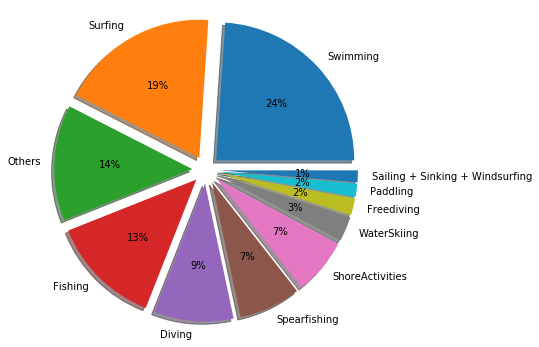

In [ ]:
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(activity_values_2, explode = explode, labels= activity_labels_2, autopct='%1.0f%%', shadow=True)
plt.axis('equal')
plt.show()

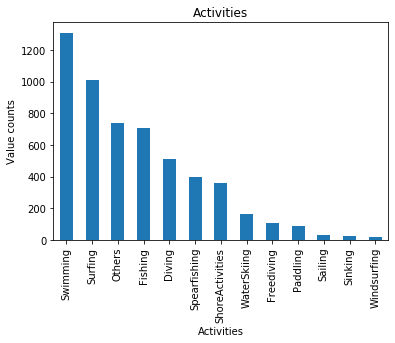

In [ ]:
plt.title('Activities')
plt.xlabel('Activities')
plt.ylabel('Value counts')
df['Activities'].value_counts().plot(kind='bar')

In [ ]:
# I won't need 'Activity' column anymore:

df = df.drop(['Activity'], axis=1)
display(df.head(3))

,Year,Type,Country,Name,Sex,Age,Fatal,Month,Century,Activities
0,2016.0,Unprovoked,USA,male,M,16,N,Sep,XXI,Surfing
1,2016.0,Unprovoked,USA,Chucky Luciano,M,36,N,Sep,XXI,Surfing
2,2016.0,Unprovoked,USA,male,M,43,N,Sep,XXI,Surfing


**Results:** Sharks mostly bite victims who are swimming, surfing, fishing or diving.

✔️ *Humans do some weird stuff (activities) to make it easier for sharks to locate them.*

### Sex

In [ ]:
df['Sex'].value_counts()

M    4848
F     585
Name: Sex, dtype: int64

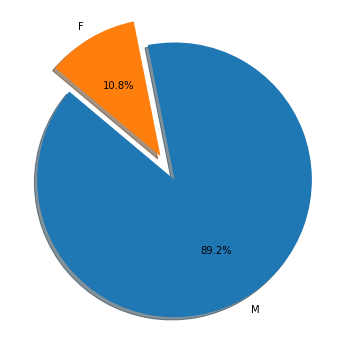

In [ ]:
explode = [0.1 for i in range(len(df['Sex'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Sex'].value_counts()], explode = explode, labels= df['Sex'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
df = df.drop(['Name'], axis=1)

**Results:** Sharks mostly attack men (89.2% male vs. 10.8% female).

✔️ *Are you a woman (female sex)? Good news: you're probably not going to get bitten by a shark.*

### Type

In [ ]:
print(set(df['Type']))

df['Type'].replace({'Boating': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Boat': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Sea Disaster': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Invalid': np.nan}, inplace=True)

print(set(df['Type']))
df['Type'].value_counts()

{'Sea Disaster', 'Provoked', 'Unprovoked', 'Boating', 'Boat', 'Invalid'}
{'Provoked', 'Unprovoked', nan}


Unprovoked    4916
Provoked       557
Name: Type, dtype: int64

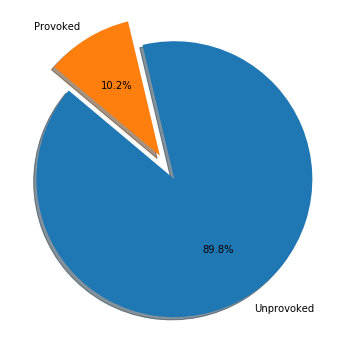

In [ ]:
explode = [0.1 for i in range(len(df['Type'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Type'].value_counts()], explode = explode, labels= df['Type'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Results:** Most attacks are unprovoked (89.8% unprovoked vs. 10.2% provoked).

✔️ *Most attacks are of type unprovoked

### Age

In [ ]:
# df["Age"].value_counts().sort_index()
Age_values = [int(e) for e in df["Age"].value_counts().sort_index()]
Age_labels = df["Age"].value_counts().sort_index().index.tolist()
Age_labels_2 = [int(e) for e in Age_labels]
print(Age_values)
print(Age_labels_2)

[54, 37, 72, 92, 98, 136, 135, 149, 146, 140, 145, 117, 113, 81, 104, 101, 83, 80, 78, 77, 83, 54, 65, 42, 45, 66, 41, 37, 48, 37, 54, 34, 36, 43, 29, 32, 25, 28, 25, 27, 35, 19, 34, 13, 14, 20, 9, 14, 12, 11, 16, 11, 8, 9, 4, 4, 3, 1, 6, 8, 6, 3, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 84, 86, 87]


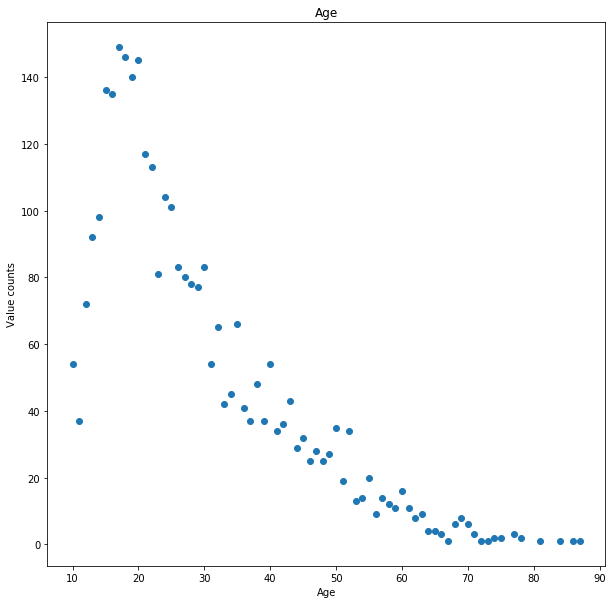

In [ ]:
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Value counts')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(Age_labels_2, Age_values)

**Results:** Sharks mostly attack young people (maximum at about 20 years old).

✔️ *It is ok to feed sharks with tender meat (young age people).*

### Country

In [ ]:
# print(df['Country'].value_counts())

# I'm going to create an "Others" category to englobe countries with a value_count < 50:

selected_countries = df['Country'].value_counts().index.tolist()[0:13]

Countries = [e.title() if e in selected_countries else 'Others' for e in df['Country']]
print(set(Countries))


{'Usa', 'New Zealand', 'Philippines', 'New Caledonia', 'Italy', 'Bahamas', 'Australia', 'Mexico', 'South Africa', 'Others', 'Brazil', 'Papua New Guinea', 'Fiji', 'Reunion'}


In [ ]:
df = df.drop(['Country'], axis=1)
df['Country'] = Countries
display(df.head(3))

,Year,Type,Sex,Fatal,Month,Century,Activities,Age,Country
0,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,16.0,Usa
1,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,36.0,Usa
2,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,43.0,Usa


In [ ]:
df['Country'].replace({'Usa': 'USA'}, inplace=True)
display(df.head(3))
print(set(df['Country']))

,Year,Type,Sex,Fatal,Month,Century,Activities,Age,Country
0,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,16.0,USA
1,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,36.0,USA
2,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,43.0,USA


{'New Zealand', 'Papua New Guinea', 'New Caledonia', 'Philippines', 'Italy', 'Bahamas', 'Australia', 'Mexico', 'South Africa', 'Others', 'Brazil', 'USA', 'Fiji', 'Reunion'}


In [ ]:
explode = [0.1 for i in range(len(df['Country'].value_counts().index.tolist()))]
explode = explode[0:5]
country_values = [e for e in df['Country'].value_counts()]
country_values_2 = country_values[0:5]
country_values_2[2] += sum(country_values[5:])
country_labels = df['Country'].value_counts().index.tolist()
country_labels = country_labels[0:5]

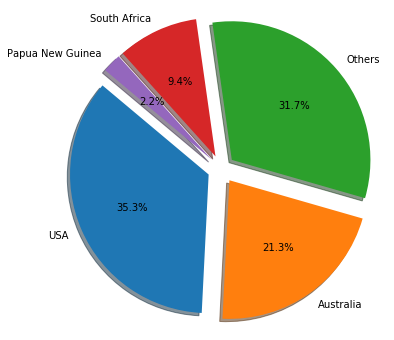

In [ ]:
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(country_values_2, explode = explode, labels= country_labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

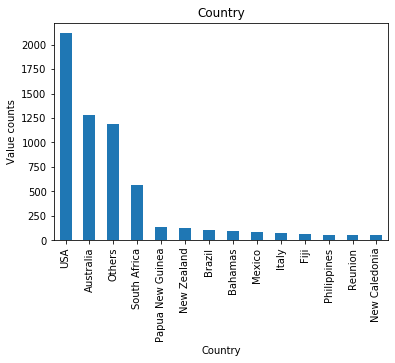

In [ ]:
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Value counts')
df['Country'].value_counts().plot(kind='bar')

**Results:** Most attacks occur in the USA and Australia.

✔️ *USA will be the most affected country, because it is the cradle of jazz.*

### Case Number

In [ ]:
display(df2.groupby(["Century", "Activities"]).size().reset_index(name="Activities_Century"))

,Century,Activities,Activities_Century
0,XVI,Diving,1
1,XVI,Others,2
2,XVI,Swimming,1
3,XVII,Others,1
4,XVII,ShoreActivities,1
5,XVII,Swimming,1
6,XVIII,Diving,1
7,XVIII,Fishing,2
8,XVIII,Others,2
9,XVIII,Surfing,1


##  My hypotheses:

* Most attacks are not **fatal**
* **July** is the month in which there are more attacks,
* Humans get into the sea in any **month** of the year.
* With each passing **year** (and **century**), more people go swimming in the sea.
* Humans do some weird stuff (**activities**) to make it easier for sharks to locate them.
* Are you a woman (female **sex**)? [Good news: you're probably not going to get bitten by a shark]
* Most attacks are of type **unprovoked**.
* **USA** will be the most affected **country**
